In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import colors
np.random.seed(0)

In [ ]:
WALL_PENALTY = -10
MOVE_PENALTY = -1
GOAL_REWARD = 0

NOISE = 0

ACTIONS = ["up","down","left","right","stay"]
WALL_CONFIG = [(2,0),(2,1),(2,2),(2,3),(2,4),(4,3),(4,4),(4,5),(4,6)
#                ,(2,6),(2,7),(2,8),(2,9),(2,10),(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),(8,10),
#               (8,11),(8,12),(9,2),(10,2),(11,2),(11,4),(11,5),(11,6),(11,7),(11,8),(11,9),(11,10),(11,11),(11,12),(11,13),(11,14),(16,0),(16,1),(16,2),(16,3),(16,4),(16,5),(16,6),(16,7),(16,8),(16,9),(16,10),
#                (16,11),(16,12),(16,13),(16,14),(16,15)
             ]


In [ ]:
#Helper function to get our Maze
def get_initial_grid(n):
    grid = []
    reward = []
    value = np.zeros((n,n))
    for i in range(0,n):
        gridline = []
        rewardline = []
        for j in range(0,n):
            match = False
            if (i == 0 and j == 0):
                gridline.append("St")
                rewardline.append(-1)
            elif ( i==n-1 and j ==n-1):
                gridline.append("Go")
                rewardline.append(0)

            else:

                for wall in WALL_CONFIG:
                    if(wall[0] == i and wall[1] == j):
                        match = True
                if(match):
                    gridline.append("W")
                    rewardline.append(-10)
                else:
                    gridline.append("_")
                    rewardline.append(-1)



        grid.append(list(gridline))
        reward.append(list(rewardline))
    return grid, reward, value


In [ ]:
#Helper function to print our Maze

def display_initial_grid(reward):
    cmap = colors.ListedColormap(['grey', 'white', 'red'])
    bounds = [-10, -1, 0, 1]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(reward, cmap=cmap, norm=norm)


In [ ]:
grid,reward_mat, value = get_initial_grid(7)

In [ ]:
# Function to get our new state based on the current state and action we are taking
def get_new_state(state,action):
    i,j = state
    if(action == "up"):
        if(i-1 >= 0 and (i-1,j) not in WALL_CONFIG):
            return (i-1,j)

    if(action == "down"):
        if(i+1 <= 6 and  (i+1,j) not in WALL_CONFIG):
            return (i+1,j)

    if(action == "left"):
        if(j-1 >= 0 and (i,j-1) not in WALL_CONFIG):
            return (i,j-1)

    if(action == "right"):
        if(j+1 <= 6 and (i,j+1) not in WALL_CONFIG):
            return (i,j+1)
    return (i,j)

#This function gives us the reward based on our actions.
def get_rewards(new_state):
    i,j = new_state
    if (i,j) in WALL_CONFIG:
        return -1000;
    elif (i,j) == (6,6):
        return 0
    else:
        return -1


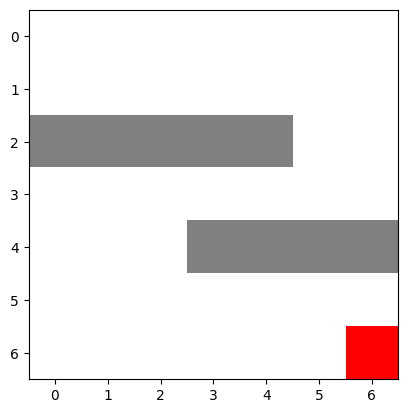

In [ ]:
display_initial_grid(reward_mat)

## Problem: You are In a Maze. Your task is to reach the Goal State with as much reward as possible.

You start at initial position 0,0. Your task is to reach the goal state (6,6). The gray lines are walls.

If you run into a wall you will get reward of -1000 and your position will stay the same as before. The reward at goal state is 0. For reaching all other states the reward is -1.

You can perform 5 Actions: __up, down, left, right, stay__. Look at the __ACTIONS__ variable. Each Action has an index associated with it as per the ACTIONS variable. For example Up is 0, Down is 1 and so on.


You have to use two algorithms: SARSA and Value Iteration to solve the problem.


The framework for the environment has been created.

To get the new state when at state __S__ and taking action __A__. Call the function __get_new_state(s,a)__.

To get the reward for reaching new state __S__, call the function __get_reward(S)__.

You can also refer to the Demo Notebook to get more clarity on how to use the Environment.


In [ ]:
##These are the actions you have. You can use this varaables to get the number each one is associated with.
ACTIONS

['up', 'down', 'left', 'right', 'stay']

### Q 1) SARSA:

#### Q 1.1) Implement SARSA and run the solution.

In [ ]:
#Helper functions to plot our Policy.

def get_arrow(index):
    if index == 0:
        return r"$\uparrow$"
    elif index == 1:
        return r"$\downarrow$"
    elif index == 2:
        return r"$\leftarrow$"
    elif index == 3:
        return r"$\rightarrow$"
    elif index == 4:
        return r"$\circlearrowleft$"

def plot_optimal_actions(data):

    cmap = colors.ListedColormap(['grey', 'white', 'red'])
    bounds = [-11, -2, 0, 12]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax1 = plt.subplots(1,1, figsize=(10,10))
    ax1.imshow(data, cmap=cmap, norm=norm)

    ax1.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
    ax1.set_xticks(np.arange(-.5, 7, 1))
    ax1.set_yticks(np.arange(-.5, 7, 1))

    for i in range(7):
        for j in range(7):
            arrow = get_arrow(np.argmax(q_table[i][j]))
            text = ax1.text(j, i, arrow, fontsize=12, ha="center", va="center", color="black")

    fig.tight_layout()

#### Q 1.2) Plot the Policy. You can use above helper functions if you want

In [ ]:
# SARSA Algorithm
def sarsa(grid, rewards, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=1000):
    q_table = np.zeros((len(grid), len(grid[0]), len(ACTIONS)))

    for _ in range(episodes):
        # Initialize the starting state
        state = (0, 0)
        action = np.argmax(q_table[state[0]][state[1]]) if random.uniform(0, 1) > epsilon else random.choice(range(len(ACTIONS)))

        while state != (6, 6):

            new_state = get_new_state(state, ACTIONS[action])
            reward = get_rewards(new_state)
            new_action = np.argmax(q_table[new_state[0]][new_state[1]]) if random.uniform(0, 1) > epsilon else random.choice(range(len(ACTIONS)))
            q_table[state[0]][state[1]][action] += alpha * (reward + gamma * q_table[new_state[0]][new_state[1]][new_action] - q_table[state[0]][state[1]][action])
            state = new_state
            action = new_action

    return q_table

#q_table_sarsa = sarsa(grid, reward_mat)


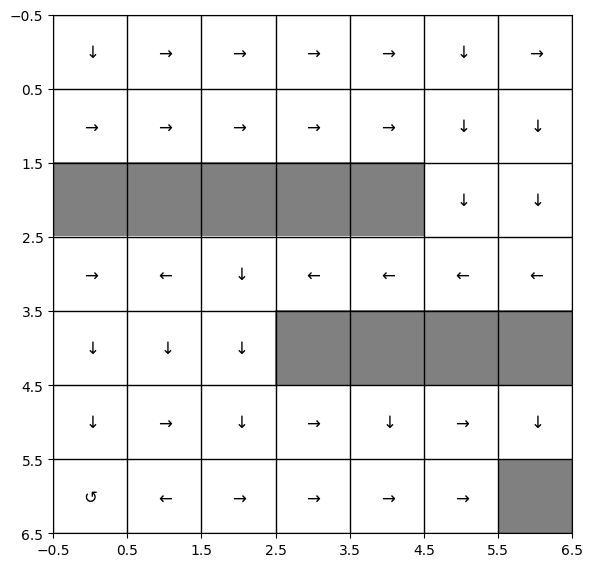

In [ ]:
def plot_optimal_actions(q_table):
    cmap = colors.ListedColormap(['white', 'grey', 'grey'])
    bounds = [-10, -1, 0, 1]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax1 = plt.subplots(1, 1, figsize=(6, 6))

    q_max = np.max(q_table, axis=-1)

    q_max[5, 6] = -10
    q_max[6, 5] = -10

    ax1.imshow(q_max, cmap=cmap, norm=norm)
    ax1.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
    ax1.set_xticks(np.arange(-.5, len(q_table[0]), 1))
    ax1.set_yticks(np.arange(-.5, len(q_table), 1))

    for i in range(len(q_table)):
        for j in range(len(q_table[0])):
            arrow = get_arrow(np.argmax(q_table[i][j]))

            if (i, j) not in WALL_CONFIG and (i, j) != (6, 6):
                text_color = "black"
                text = ax1.text(j, i, arrow, fontsize=12, ha="center", va="center", color=text_color)

    fig.tight_layout()

q_table_sarsa = sarsa(grid, reward_mat)

# Plot the optimal actions
plot_optimal_actions(q_table_sarsa)
plt.show()




Note: (6,6) is the goal state not the wall. Please dont get confused by same colour.